In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import folium
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors



In [ ]:
res = requests.get("https://www.britannica.com/topic/list-of-state-capitals-in-the-United-States-2119210")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))



In [ ]:
usa_cities = df[0]

In [ ]:

usa_cities.head()

,state,capital,population of capital: census,population of capital: estimated
0,Alabama,Montgomery,"(2010) 205,764","(2018 est.) 198,218"
1,Alaska,Juneau,"(2010) 31,275","(2018 est.) 32,113"
2,Arizona,Phoenix,"(2010) 1,445,632","(2018 est.) 1,660,272"
3,Arkansas,Little Rock,"(2010) 193,524","(2018 est.) 197,881"
4,California,Sacramento,"(2010) 466,488","(2018 est.) 508,529"


In [ ]:
usa_cities.drop(['population of capital: census','population of capital: estimated'],axis=1,inplace=True)

In [ ]:

usa_cities.head()

,state,capital
0,Alabama,Montgomery
1,Alaska,Juneau
2,Arizona,Phoenix
3,Arkansas,Little Rock
4,California,Sacramento


In [ ]:
usa_cities.rename(columns={'state':'State','capital':'Capital'},inplace=True)
usa_cities.head()

,State,Capital
0,Alabama,Montgomery
1,Alaska,Juneau
2,Arizona,Phoenix
3,Arkansas,Little Rock
4,California,Sacramento


In [ ]:
coun_lati = list()
coun_longi = list()
for state,capital in zip(usa_cities['State'] ,usa_cities['Capital']) :
    geolocator = Nominatim(user_agent="foursquare_agent")
    try:
        location = geolocator.geocode(capital + ','+state )
        latitude = location.latitude
        longitude = location.longitude
        coun_lati.append(latitude)
        coun_longi.append(longitude)
    except:
        coun_lati.append(None)
        coun_longi.append(None)
        
  
    

In [ ]:
usa_cities['latitude'] = coun_lati
usa_cities['longitude'] = coun_longi
usa_cities.head()


,State,Capital,latitude,longitude
0,Alabama,Montgomery,32.366966,-86.300648
1,Alaska,Juneau,58.301950,-134.419734
2,Arizona,Phoenix,33.448437,-112.074142
3,Arkansas,Little Rock,34.746481,-92.289595
4,California,Sacramento,38.581572,-121.494400


In [ ]:
CLIENT_ID = 'ZJ4HT4R43I1ZZO4S4LPML20212KHNZOI1ZV1GH5S3M0ZHA2L' # your Foursquare ID
CLIENT_SECRET = 'BXFBYSLTWEQX4RZNRGYYTVUETDLOQDBQMED04YHOVSCGNB4S' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZJ4HT4R43I1ZZO4S4LPML20212KHNZOI1ZV1GH5S3M0ZHA2L
CLIENT_SECRET:BXFBYSLTWEQX4RZNRGYYTVUETDLOQDBQMED04YHOVSCGNB4S


In [153]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000,LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Capital', 
                  'Capital Latitude', 
                  'Capital Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [154]:
usa_venues = getNearbyVenues(names=usa_cities['Capital'],
                                   latitudes=usa_cities['latitude'],
                                   longitudes=usa_cities['longitude']
                                  )

Montgomery
Juneau
Phoenix
Little Rock
Sacramento
Denver
Hartford
Dover
Tallahassee
Atlanta
Honolulu
Boise
Springfield
Indianapolis
Des Moines
Topeka
Frankfort
Baton Rouge
Augusta
Annapolis
Boston
Lansing
Saint Paul
Jackson
Jefferson City
Helena
Lincoln
Carson City
Concord
Trenton
Santa Fe
Albany
Raleigh
Bismarck
Columbus
Oklahoma City
Salem
Harrisburg
Providence
Columbia
Pierre
Nashville
Austin
Salt Lake City
Montpelier
Richmond
Olympia
Charleston
Madison
Cheyenne


In [155]:
usa_venues.head()

,Capital,Capital Latitude,Capital Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Montgomery,32.366966,-86.300648,Filet & Vine,32.358402,-86.298932,Wine Shop
1,Montgomery,32.366966,-86.300648,Chick-fil-A,32.363210,-86.295230,Food Service
2,Montgomery,32.366966,-86.300648,Vintage Year,32.358461,-86.299594,American Restaurant
3,Montgomery,32.366966,-86.300648,Hamburger King,32.370919,-86.301991,Burger Joint
4,Montgomery,32.366966,-86.300648,Corcino's Fine Italian Food,32.364133,-86.308336,Italian Restaurant


In [156]:
usa_venues.groupby(['Capital']).count()

,Capital Latitude,Capital Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Capital,,,,,,
Albany,100,100,100,100,100,100
Annapolis,100,100,100,100,100,100
Atlanta,100,100,100,100,100,100
Augusta,68,68,68,68,68,68
Austin,100,100,100,100,100,100
Baton Rouge,65,65,65,65,65,65
Bismarck,100,100,100,100,100,100
Boise,100,100,100,100,100,100
Boston,100,100,100,100,100,100


In [157]:
usa_onehot = pd.get_dummies(usa_venues[['Venue Category']], prefix="", prefix_sep="")
usa_onehot['Capital'] = usa_venues['Capital'] 
fixed_columns = [usa_onehot.columns[-1]] + list(usa_onehot.columns[:-1])
usa_onehot = usa_onehot[fixed_columns]

usa_onehot.head()

,Capital,ATM,Accessories Store,Advertising Agency,African Restaurant,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,...,Street Fair,Street Food Gathering,Strip Club,Student Center,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train,Train Station,University,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Montgomery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Montgomery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Montgomery,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Montgomery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Montgomery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
usa_grouped = usa_onehot.groupby('Capital').mean().reset_index()
usa_grouped

,Capital,ATM,Accessories Store,Advertising Agency,African Restaurant,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,...,Street Fair,Street Food Gathering,Strip Club,Student Center,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train,Train Station,University,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Albany,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.030000,0.010000,0.00,0.00,0.00,0.010000,0.000000,0.000000,0.010000,0.01000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.00,0.00,0.000000,0.01,0.010000,0.010000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.010000,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.040000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.01000,0.000000,0.00,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.010000,0.000000,0.00,0.000000,0.00
1,Annapolis,0.000000,0.010000,0.00,0.00,0.000000,0.000000,0.050000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.020000,0.000000,0.00000,0.000000,0.000000,0.000000,0.010000,0.010000,0.020000,0.010000,0.050000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.00,0.00,0.000000,0.00,0.010000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.010000,0.000000,0.00,0.000000,0.00
2,Atlanta,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.010000,0.000000,0.02,0.01,0.01,0.050000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.01,0.00,0.000000,0.01,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,...,0.00,0.00,0.01,0.00,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.000000,0.010000,0.01,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.00,0.000000,0.010000,0.000000,0.00,0.000000,0.00
3,Augusta,0.000000,0.000000,0.00,0.00,0.014706,0.000000,0.058824,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.014706,0.000000,0.014706,0.014706,0.014706,0.029412,0.014706,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.014706,0.00,0.000000,0.000000,0.00,0.000000,...,0.00,0.00,0.00,0.00,0.014706,0.000000,0.00,0.000000,0.000000,0.014706,0.000000,0.000000,0.000000,0.00,0.014706,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.014706,0.00000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00
4,Austin,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.040000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.01,0.000000,0.000000,0.01,0.000000,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.020000,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000

In [159]:
num_top_venues = 5

for hood in usa_grouped['Capital']:
    print("----"+hood+"----")
    temp = usa_grouped[usa_grouped['Capital'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany----
         venue  freq
0          Pub  0.07
1         Café  0.07
2  Coffee Shop  0.05
3      Theater  0.04
4        Hotel  0.04


----Annapolis----
                 venue  freq
0                  Bar  0.05
1          Coffee Shop  0.05
2   Seafood Restaurant  0.05
3  American Restaurant  0.05
4   Italian Restaurant  0.03


----Atlanta----
                  venue  freq
0           Art Gallery  0.05
1             BBQ Joint  0.04
2                  Café  0.03
3  Caribbean Restaurant  0.03
4           Coffee Shop  0.03


----Augusta----
                  venue  freq
0           Pizza Place  0.09
1   American Restaurant  0.06
2              Pharmacy  0.06
3  Fast Food Restaurant  0.06
4        Sandwich Place  0.04


----Austin----
                 venue  freq
0                  Bar  0.07
1          Coffee Shop  0.06
2                Hotel  0.06
3        Grocery Store  0.05
4  American Restaurant  0.04


----Baton Rouge----
                 venue  freq
0  American Restaurant  0.0

In [160]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [161]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Capital']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Capital'] = usa_grouped['Capital']

for ind in np.arange(usa_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(usa_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany,Café,Pub,Coffee Shop,Convenience Store,Hotel,Park,Theater,Pharmacy,American Restaurant,Pizza Place
1,Annapolis,Bar,American Restaurant,Seafood Restaurant,Coffee Shop,Hotel,Sandwich Place,Pub,Italian Restaurant,Breakfast Spot,Arts & Crafts Store
2,Atlanta,Art Gallery,BBQ Joint,Coffee Shop,Café,Caribbean Restaurant,Juice Bar,Mexican Restaurant,Lounge,Sports Club,Fast Food Restaurant
3,Augusta,Pizza Place,Fast Food Restaurant,Pharmacy,American Restaurant,Sandwich Place,Donut Shop,Smoke Shop,Ice Cream Shop,Bank,Construction & Landscaping
4,Austin,Bar,Coffee Shop,Hotel,Grocery Store,Italian Restaurant,American Restaurant,Cocktail Bar,New American Restaurant,Diner,Speakeasy


In [162]:
kclusters = 5

usa_grouped_clustering = usa_grouped.drop('Capital', 1)


kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(usa_grouped_clustering)


kmeans.labels_[0:10] 

array([1, 3, 3, 2, 3, 3, 1, 0, 1, 1], dtype=int32)

In [163]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

usa_merged = usa_cities

usa_merged = usa_merged.join(neighborhoods_venues_sorted.set_index('Capital'), on='Capital')

usa_merged.head() 

,State,Capital,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alabama,Montgomery,32.366966,-86.300648,1,History Museum,Bar,Sandwich Place,Pizza Place,BBQ Joint,American Restaurant,Pharmacy,Theater,Gym,Mexican Restaurant
1,Alaska,Juneau,58.301950,-134.419734,3,Boat or Ferry,Seafood Restaurant,Gift Shop,Cruise,Coffee Shop,Bar,Pizza Place,Dive Bar,American Restaurant,Souvenir Shop
2,Arizona,Phoenix,33.448437,-112.074142,3,Coffee Shop,American Restaurant,Hotel,Art Gallery,Pizza Place,Mexican Restaurant,Cocktail Bar,Bar,Salon / Barbershop,Music Venue
3,Arkansas,Little Rock,34.746481,-92.289595,0,Pizza Place,Hotel,Sandwich Place,Coffee Shop,Bar,Intersection,Bakery,Park,Beer Garden,American Restaurant
4,California,Sacramento,38.581572,-121.494400,3,American Restaurant,Coffee Shop,Pizza Place,Sandwich Place,Hotel,Deli / Bodega,Café,Movie Theater,New American Restaurant,Mexican Restaurant


In [164]:
latitude = 39.381266
longitude = -97.922211
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(usa_merged['latitude'], usa_merged['longitude'], usa_merged['Capital'], usa_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

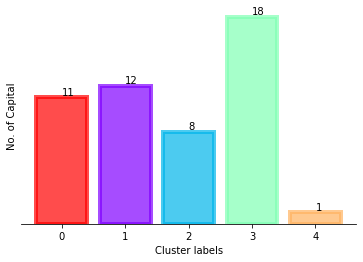

In [166]:
import matplotlib.pyplot as plt
plt_color = [rainbow[rainbow.index(i)-1] for i in rainbow ]
bars = plt.bar(x=cluster_group.index,height=cluster_group['Capital'],edgecolor=plt_color,color=plt_color,alpha=0.7,linewidth=4)
plt.xlabel('Cluster labels')
plt.ylabel('No. of Capital')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
for bar in bars:

  plt.annotate(s=bar.get_height(),xy=(bar.get_x()+bar.get_width()/2,bar.get_height()+0.2))

In [204]:
C1= usa_merged[usa_merged['Cluster Labels']==0].groupby(['1st Most Common Venue']).size().sort_values(ascending=False)
print(f"most common venue in cluster 0 is {C1.index[0]}")

most common venue in cluster 0 is Coffee Shop


In [205]:
C2= usa_merged[usa_merged['Cluster Labels']==1].groupby(['1st Most Common Venue']).size().sort_values(ascending=False)
print(f"most common venue in cluster 1 is {C2.index[0]}")

most common venue in cluster 1 is Coffee Shop


In [201]:
C3 =usa_merged[usa_merged['Cluster Labels']==2].groupby(['1st Most Common Venue']).size().sort_values(ascending=False)
print(f"most common venue in cluster 2 is {C3.index[0]}")

most common venue in cluster 2 is Pizza Place


In [202]:
C4 =usa_merged[usa_merged['Cluster Labels']==3].groupby(['1st Most Common Venue']).size().sort_values(ascending=False)
print(f"most common venue in cluster 2 is {C4.index[0]}")

most common venue in cluster 2 is Bar


In [203]:
C5 =usa_merged[usa_merged['Cluster Labels']==4].groupby(['1st Most Common Venue']).size().sort_values(ascending=False)
print(f"most common venue in cluster 2 is {C5.index[0]}")

most common venue in cluster 2 is History Museum


In [207]:
C5 =usa_merged[usa_merged['Cluster Labels']==4]
C5

,State,Capital,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Kentucky,Frankfort,38.200905,-84.873284,4,History Museum,American Restaurant,Diner,Food Court,Pizza Place,Bookstore,Bank,Seafood Restaurant,Restaurant,Bar
